In [41]:
from sklearn.datasets import load_iris #iris꽃 데이터 불러오기
iris_dataset = load_iris()

In [42]:
print(iris_dataset.DESCR) #DESCR : 설명

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [43]:
print('iris_dataset의 키 :\n', iris_dataset.keys()) #전체 컬럼을 가져옴 ,라벨 데이터는 target에

iris_dataset의 키 :
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [44]:
print('타킷의 이름\n',iris_dataset['target_names'])

타킷의 이름
 ['setosa' 'versicolor' 'virginica']


In [45]:
print('특징의 이름\n',iris_dataset['feature_names'])

특징의 이름
 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [46]:
print('data의 타입', type(iris_dataset['data']))

data의 타입 <class 'numpy.ndarray'>


In [47]:
print('data의 크기', iris_dataset['data'].shape) #shape : 크기

data의 크기 (150, 4)


In [48]:
print('data의 처음 다섯개:\n', iris_dataset['data'][:5])

data의 처음 다섯개:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [49]:
print('target의 타입:', type(iris_dataset['target']))

target의 타입: <class 'numpy.ndarray'>


In [50]:
print('target의 크기:', iris_dataset['target'].shape) #(150, )는 1차원 데이터라는 것

target의 크기: (150,)


In [51]:
print('target의 내용:\n',iris_dataset['target']) #3개의 항목지 저장되어 있다는 것

target의 내용:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [52]:
# 데이터의 준비
#학습용 데이터와 테스트용 데이터를 쪼갠다.
from sklearn.model_selection import train_test_split

In [53]:
X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'],iris_dataset['target'],random_state = 0, test_size = 0.3) #데이터와 라벨을 주어야 한다, x값과 y값을 훈련시키는 곳, 테스트할 곳으로 나눈다, test_size 크기 조절

In [54]:
print('X_train의 크기 : ', X_train.shape)
print('y_train의 크기 : ', y_train.shape)

X_train의 크기 :  (105, 4)
y_train의 크기 :  (105,)


In [55]:
print('X_test의 크기 : ', X_test.shape)
print('y_test의 크기 : ', y_test.shape)

X_test의 크기 :  (45, 4)
y_test의 크기 :  (45,)


In [73]:
!pip install mglearn
# 데이터의 시각화
import pandas as pd
import matplotlib.pyplot as mlt
import sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [74]:
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset['feature_names']) #데이터, 인덱스

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa2eee75650>,
      dtype=object)

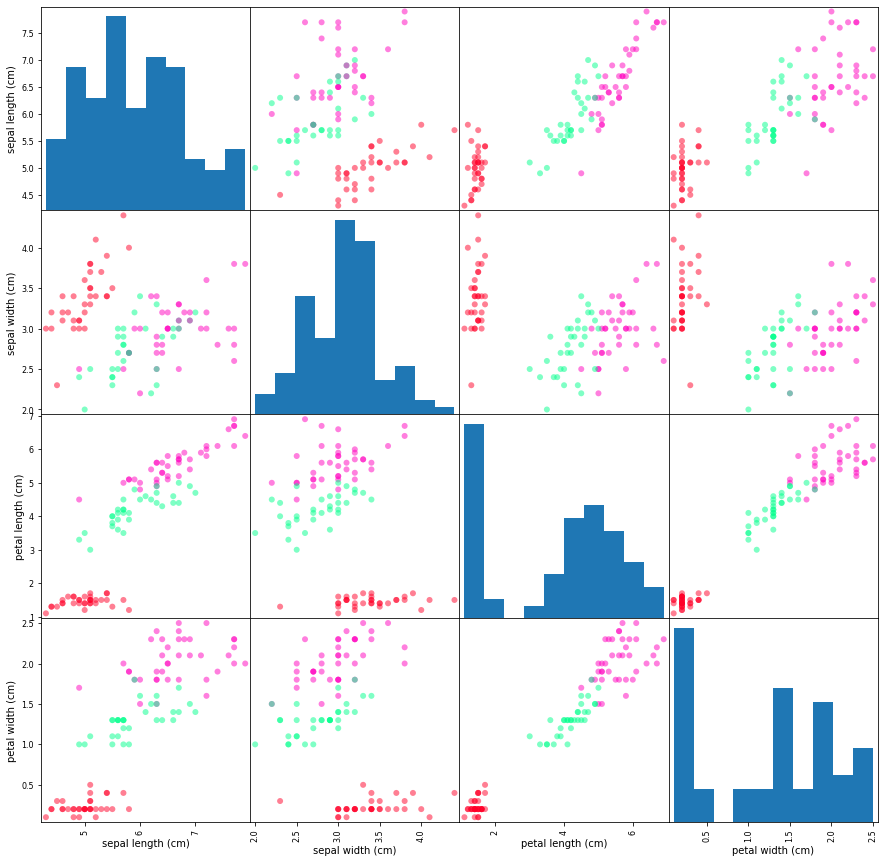

In [75]:
pd.plotting.scatter_matrix(iris_dataframe, figsize=(15,15), marker='o', c = y_train, cmap='gist_rainbow') #여러개 scatter

In [76]:
# 첫 번째 머신러닝 모델 : k-최근접 알고리즘
from sklearn.neighbors import KNeighborsClassifier #Classifier 분류
knn = KNeighborsClassifier(n_neighbors=1) #1개의 이웃

In [79]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [85]:
# 예측하기
import numpy as np
X_new = np.array([[5, 2.9, 1, 0.2]]) #예측용 샘플 데이터


In [88]:
prediction = knn.predict(X_new) # 2차원 이상의 데이터로 만들어야 한다.
print('예측 : ',prediction)
print('예측한 타깃의 이름 : ', iris_dataset['target_names'][prediction])

예측 :  [0]
예측한 타깃의 이름 :  ['setosa']


In [91]:
# 모델을 평가
y_pred = knn.predict(X_test)
print('테스트 세트에 대한 예측값 : \n',y_pred)

테스트 세트에 대한 예측값 : 
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2 1 1 2 0 2 0 0]


In [92]:
y_pred == y_test #테스트결과와 라벨이 맞는지 확인

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True])

In [94]:
print('테스트 세트에 대한 정확도 : \n', np.mean(y_pred == y_test)*100) #정확도, np로 표현

테스트 세트에 대한 정확도 : 
 97.77777777777777


In [97]:
print('테스트 세트에 대한 정확도 : \n', knn.score(X_test, y_test)*100) #knn 사용

테스트 세트에 대한 정확도 : 
 97.77777777777777
